## Introducción

Entrenamiento de modelo preentrenado para resolver el problema de predecir el ángulo del auto en base a la imagen.

Fuertemente basado en:
- https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Imports

In [2]:
import torch
import dataset_modules.image_preloader as image_preloader
import main
import importlib
import dataset_modules.preloaded_one_part_dataset as popd
import torchvision.transforms as transforms

importlib.reload(main)
importlib.reload(popd)

<module 'dataset_modules.preloaded_one_part_dataset' from '/clusteruy/home/franco.cuevas/tesis-jupyters-2/dataset_modules/preloaded_one_part_dataset.py'>

## Variables

In [3]:
FEATURE_EXTRACTION = False

device_string = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_string)

if device_string == "cuda":
    print("Usando GPU!")

Usando GPU!


In [4]:
# preload images
preloaded_images = image_preloader.preload_images(
        images_folder='./dataset_modules/imgs/', 
        state_file='./dataset_modules/state.json', 
        resize_to=224
)

Started to preload images...
Image preloading complete in 6m 34s
The preloaded images use 0.140716552734375MB of memory


LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #2090, 74.56%
Class: puerta_delantera_roto, #713, 25.44%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #502, 72.65%
Class: puerta_delantera_roto, #189, 27.35%
#TRAIN 2803 #TEST 691
Epoch 0/99
----------
train Loss: 0.5703 Main metric (macro_f1): 0.4271 Time: 26.11s
test Loss: 0.5841 Main metric (macro_f1): 0.4208 Time: 2.52s
Epoch 1/99
----------
train Loss: 0.5521 Main metric (macro_f1): 0.4271 Time: 21.59s
test Loss: 0.5821 Main metric (macro_f1): 0.4314 Time: 2.62s
ES Module Best: 0.5820747639353127, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.5380 Main metric (macro_f1): 0.4331 Time: 21.61s
test Loss: 0.5674 Main metric (macro_f1): 0.4208 Time: 2.50s
ES Module Best: 0.5674363134911368, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.5219 Main metric (macro_f1): 0.4485 Time: 21.59s
test Loss: 0.5833 Main metric (macro_f1): 0.4208 Time: 2.50s
ES Module Best: 0.5674363134911368, BadE

,class,precision,recall,f1
0,puerta_delantera_roto,0.532258,0.174603,0.262948
1,puerta_delantera_sano,0.751987,0.942231,0.836428


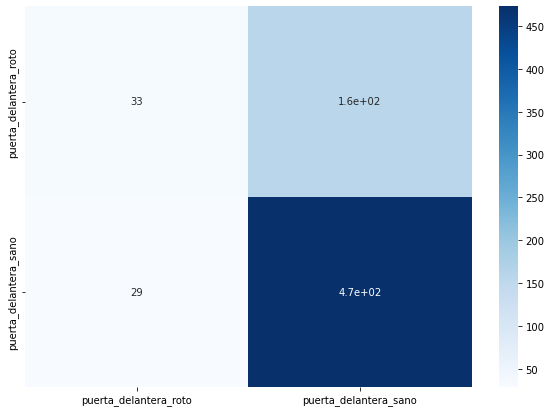

In [4]:
part = "Puerta Delantera"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "puerta-delantera_only_metadata"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=False
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #2525, 90.08%
Class: puerta_delantera_roto, #278, 9.92%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #607, 87.84%
Class: puerta_delantera_roto, #84, 12.16%
#TRAIN 2803 #TEST 691
Epoch 0/99
----------
train Loss: 0.3237 Main metric (macro_f1): 0.4739 Time: 21.64s
test Loss: 0.3608 Main metric (macro_f1): 0.4676 Time: 2.51s
Epoch 1/99
----------
train Loss: 0.3119 Main metric (macro_f1): 0.4739 Time: 21.48s
test Loss: 0.3525 Main metric (macro_f1): 0.4676 Time: 2.50s
ES Module Best: 0.3525111190489508, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.3002 Main metric (macro_f1): 0.4739 Time: 21.75s
test Loss: 0.3482 Main metric (macro_f1): 0.4676 Time: 2.49s
ES Module Best: 0.34818828538297397, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.2899 Main metric (macro_f1): 0.4739 Time: 21.96s
test Loss: 0.3432 Main metric (macro_f1): 0.4676 Time: 2.61s
ES Module Best: 0.3431569121335936, BadEp

,class,precision,recall,f1
0,puerta_delantera_roto,0.636364,0.166667,0.264151
1,puerta_delantera_sano,0.895366,0.986820,0.938871


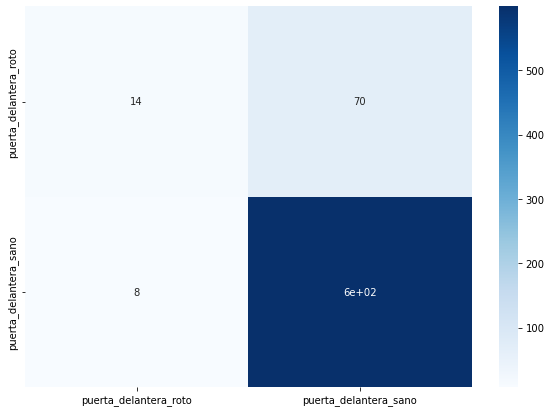

In [5]:
part = "Puerta Delantera"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "puerta_delantera-selected-parts"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #3132, 89.64%
Class: puerta_delantera_roto, #362, 10.36%
3494
tensor([4.8260, 0.5578])
LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #2525, 90.08%
Class: puerta_delantera_roto, #278, 9.92%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #607, 87.84%
Class: puerta_delantera_roto, #84, 12.16%
#TRAIN 2803 #TEST 691
Epoch 0/99
----------
train Loss: 0.6868 Main metric (macro_f1): 0.5031 Time: 20.99s
test Loss: 0.7284 Main metric (macro_f1): 0.4676 Time: 2.82s
Epoch 1/99
----------
train Loss: 0.6215 Main metric (macro_f1): 0.5851 Time: 23.01s
test Loss: 0.6820 Main metric (macro_f1): 0.5606 Time: 2.77s
ES Module Best: 0.6819707358797794, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.5716 Main metric (macro_f1): 0.6297 Time: 22.87s
test Loss: 0.6869 Main metric (macro_f1): 0.5738 Time: 2.84s
ES Module Best: 0.6819707358797794, BadEpochs: 1
Epoch 3/99
----------
train Loss: 0.4909

,class,precision,recall,f1
0,puerta_delantera_roto,0.363636,0.380952,0.372093
1,puerta_delantera_sano,0.913765,0.907743,0.910744


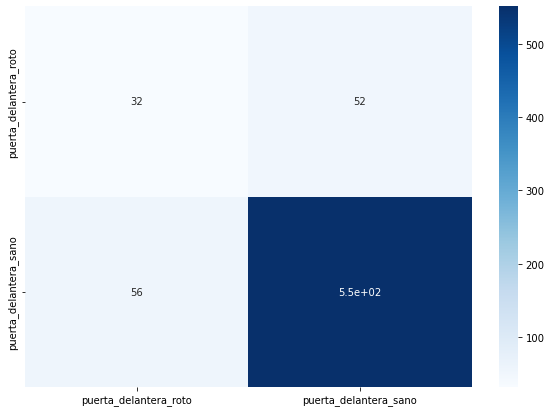

In [6]:
import sklearn
part = "Puerta Delantera"
dataset = popd.PreloadedOnePartDataset(
    part,
    preloaded_images,
    remove_not_visible=True,
    use_selected_parts=True
)

print(len(dataset.samples))
y = [y_s for (_,y_s,_) in dataset.samples]
balanced_weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes=[0,1], y=y)
balanced_weights = torch.tensor(balanced_weights,dtype=torch.float)
print(balanced_weights)

MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "puerta-delantera_use-selected-parts_balanced-weights"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True,
    class_weights=balanced_weights
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #2525, 81.95%
Class: puerta_delantera_roto, #556, 18.05%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #607, 87.84%
Class: puerta_delantera_roto, #84, 12.16%
#TRAIN 3081 #TEST 691
Epoch 0/99
----------
train Loss: 0.4718 Main metric (macro_f1): 0.4492 Time: 25.54s
test Loss: 0.3865 Main metric (macro_f1): 0.4676 Time: 2.82s
Epoch 1/99
----------
train Loss: 0.4420 Main metric (macro_f1): 0.4504 Time: 25.17s
test Loss: 0.3546 Main metric (macro_f1): 0.4676 Time: 2.73s
ES Module Best: 0.35455655161016414, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.4247 Main metric (macro_f1): 0.4523 Time: 25.18s
test Loss: 0.3476 Main metric (macro_f1): 0.4676 Time: 2.74s
ES Module Best: 0.3476301179780974, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.3999 Main metric (macro_f1): 0.4671 Time: 25.10s
test Loss: 0.3569 Main metric (macro_f1): 0.5127 Time: 2.78s
ES Module Best: 0.3476301179780974, BadE

,class,precision,recall,f1
0,puerta_delantera_roto,0.435897,0.202381,0.276423
1,puerta_delantera_sano,0.897239,0.963756,0.929309


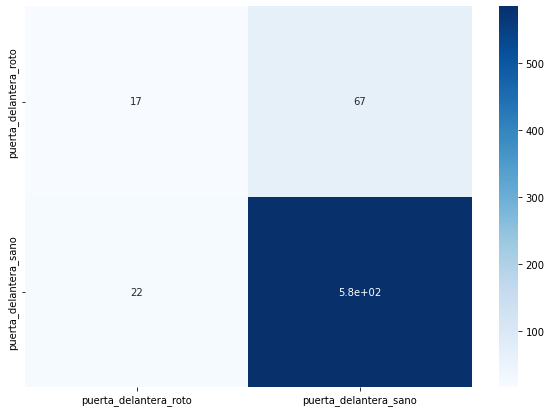

In [7]:
part = "Puerta Delantera"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "puerta-delantera_use-selected-parts_dataug"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True,
    data_augmentation=transforms.Compose([transforms.RandomHorizontalFlip(p=1)]),
    class_to_augment=0,
    offline_augmentation=278
)